In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [3]:
file1 = open('ob-la-di_ob-la-da.txt', 'r')

pos = 0
neg = 0
neu = 0
lines = 0
 
# Rating each line
for line in file1:
    b = line.strip()
    score = sid.polarity_scores(b)
    
    if b != "" :
        lines += 1
        print("{}\n {}".format(b, score))
    
        # depending on trends throughout files, I may adjust these markers (0.2 and -0.2)
    
        if score['compound'] >= 0.2 :
            print(" Positive")
            pos += 1
 
        elif score['compound'] <= - 0.2 :
            print(" Negative")
            neg += 1
 
        else :
            print(" Neutral")
            neu += 1

# Closing file(s)
file1.close()

Desmond has a barrow in the marketplace
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Neutral
Molly is the singer in a band
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Neutral
Desmond says to Molly, "Girl, I like your face"
 {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.3612}
 Positive
And Molly says this as she takes him by the hand
 {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.4939}
 Positive
Ob-la-di, ob-la-da
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Neutral
Life goes on, bra
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Neutral
La-la, how the life goes on
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Neutral
Ob-la-di, ob-la-da
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Neutral
Life goes on, bra
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Neutral
La-la, how the life goes on
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Neutral
Desmond takes a trolley to the jeweler's store


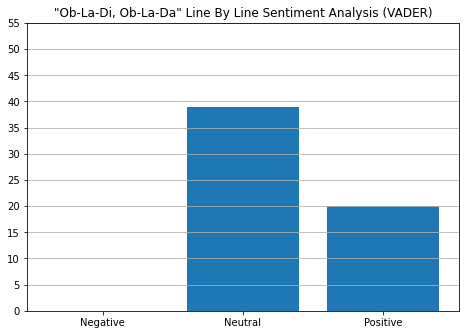

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lbls = ['Negative', 'Neutral', 'Positive']
compounds = [neg, neu, pos]
ax.bar(lbls, compounds)
ax.set_title('"Ob-La-Di, Ob-La-Da" Line By Line Sentiment Analysis (VADER)')
ax.set_yticks(np.arange(0, lines, 5))
ax.grid(axis='y')
plt.show()

In [5]:
# The following code calculates the net sentiment rate of the song overall, rather than considering it line by line
file1 = open('ob-la-di_ob-la-da.txt', 'r')

nsr = np.zeros(lines + 1, dtype=float) # a 1x15 array (0:14 lines)
sumVec = np.zeros(lines + 1, dtype=float) # another 1x15 array for summing compound across lines
sumCompound = 0
lineCompound = np.zeros(lines + 1, dtype = float) # another 1x15 array for plotting each line's compound
lines = 0
vec = [0,0,0]; 

for line in file1:
    b = line.strip()
    score = sid.polarity_scores(b)
    
    if b != '' :
        lines += 1
        
        # add polarity scores of all lines to evaluate song as a whole later
        vec = [vec[0] + score['neg'], vec[1] + score['neu'], vec[2] + score['pos']]
    
        # evaluate song using net sentiment rate
        nsr[lines] = (vec[2] - vec[0]) / lines
        
        # sum all compounds 
        sumCompound += score['compound']
        sumVec[lines] = sumCompound
        
        # input line's compound
        lineCompound[lines] = score['compound']
    
# Closing file(s)
file1.close()

In [6]:
print(nsr[lines]) # the final calculation of net sentiment rate

0.17501694915254234


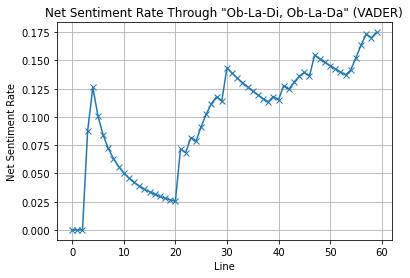

In [7]:
plt.plot(nsr, marker="x")
plt.title('Net Sentiment Rate Through "Ob-La-Di, Ob-La-Da" (VADER)')
plt.xlabel('Line')
plt.ylabel('Net Sentiment Rate')
plt.grid(True)
plt.show()

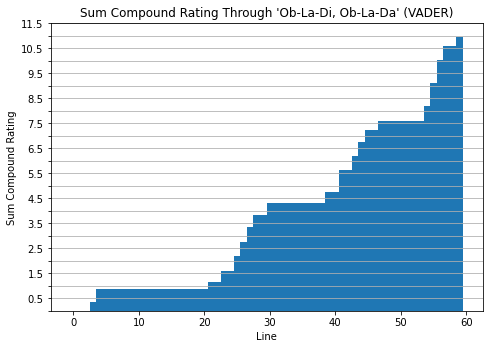

In [11]:
# create a histogram of the sum compound... (sumVec)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = np.arange(0, lines+1)
ax.bar(x, sumVec, width=1)
plt.grid(axis='y')
plt.yticks(np.arange(0, max(sumVec)+1, step=0.5))
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(False)
plt.title("Sum Compound Rating Through 'Ob-La-Di, Ob-La-Da' (VADER)")
plt.xlabel("Line")
plt.ylabel("Sum Compound Rating")
plt.show()

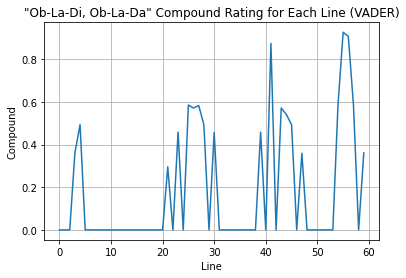

In [9]:
plt.plot(lineCompound)
plt.title('"Ob-La-Di, Ob-La-Da" Compound Rating for Each Line (VADER)')
plt.xlabel('Line')
plt.ylabel('Compound')
plt.grid(True)
plt.show()